# Perfect Foresight Model Impatience Conditions

In [5]:
# Initial notebook set up

%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

# These last two will make our charts look nice
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')


After using the Jupyter notebook [Gentle-Intro-To-HARK-PerfForesightCRRA](https://github.com/econ-ark/DemARK/blob/Course-Choice/notebooks/Gentle-Intro-To-HARK-PerfForesightCRRA.ipynb) to learn the basics of HARK, answer the following questions:



[PerfectForesightCRRA](http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/Consumption/PerfForesightCRRA) defines several 'impatience' conditions that are useful in understanding the model.  We will use here the HARK toolkit's solution to the permanent-income-normalized version of the model, constructing a consumption function for the ratio of consumption to permanent income.

The handout claims that in order for the perfect foresight consumption model to be useful, it is necessary to impose
the 'return impatience condition' (RIC):

\begin{eqnarray}
  \frac{(R \beta)^{1/\rho}}{R} & < & 1
\end{eqnarray}

and defines some other inequalities that help characterize what happens in the model (or whether it has a solution at all).

This question asks you to explore numerically what happens to the consumption function as these conditions get close to failing.

Specifically, given the default set of parameter values used in the notebook below, you should:

1. Plot the consumption function for a perfect foresight consumer with those defaultparameter values, along with the "sustainable" level of consumption that would preserve wealth
1. Calculate the numerical values of the three impatience conditions
0. Calculate the values of $\beta$ and $G$ such that the impatience factors on the LHS of the two equations would be exactly equal to 1

Next, along with the sustainable consumption function, you should plot a sequence of consumption functions of a HARK `PerfForesightConsumerType` consumer, for a set of parameter values that go from the default value toward some interesting point:

1. For some sequence of values of $\beta$ that go from the default value to some value very close to the point where the RIC fails
   * Actually, we do this one for you to show how to do it generically
0. For some sequence of values of $G$ that go from the default value to some value just below the maximum possible value of $G$.  (Why is it the maximum possible value?)
0. For some sequence of values of $\rho$ that go from the default value to some value that is very large

and in each case you should explain, using analytical mathematical reasoning, the numerical result you get.  (You can just type your answers in the notebook).

In [6]:
# Import the machinery for solving the perfect foresight model and the default parameters

from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType # Import the consumer type
import HARK.ConsumptionSaving.ConsumerParameters as Params # Import default parameters

# Now extract the default values of the parameters of interest

CRRA       = Params.CRRA 
Rfree      = Params.Rfree 
DiscFac    = Params.DiscFac
PermGroFac = Params.PermGroFac
rfree      = Rfree-1

In [7]:
# Now create a perfect foresight consumer example
PFagent = PerfForesightConsumerType(**Params.init_perfect_foresight)
PFagent.cycles = 0 # We need the consumer to be infinitely lived
PFagent.LivPrb = [1.0] # Suppress the possibility of dying

# Solve the agent's problem
PFagent.solve()

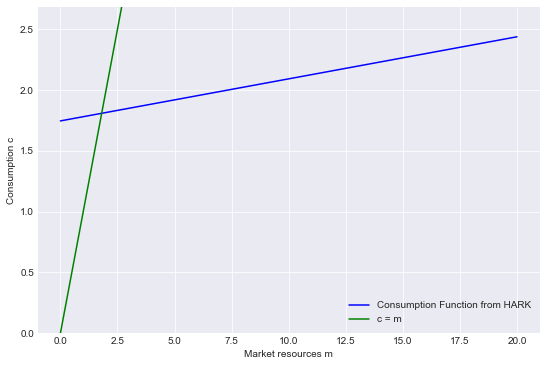

In [8]:
# Plot the consumption function 

# Remember, after invoking .solve(), the consumption function is stored as PFagent.solution[0].cFunc

# Set out some range of market resources that we want to plot consumption for

mMin = 0
mMax = 20
numPoints = 100
m_range  = np.linspace(mMin, mMax, numPoints) # This creates an array of points in the given range

# Feed our range of market resources into our consumption function in order to get consumption at each point

cHARK = PFagent.solution[0].cFunc(m_range) # Because the input m_range is an array, the output cHARK is too

# Construct the 45 degree line where value on vertical axis matches horizontal
degree45 = m_range # This will be the array of y points identical to the x points

# Find the value of consumption at the largest value of m
c_max    = PFagent.solution[0].cFunc([mMax])

# Use matplotlib package (imported in first cell) to plot the consumption function
plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,c_max[0]*1.1)     # set the range for the vertical axis with a 10 percent margin at top
plt.plot(m_range, cHARK, 'b', label='Consumption Function from HARK') # Plot m's on the x axis, versus our c on the y axis, and make the line blue, with a label
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# The plot is named plt and it hangs around like a variable 
# but is not displayed until you do a plt.show()

plt.plot(m_range, degree45  , 'g', label='c = m') # Add 45 degree line
plt.legend() # construct the legend

plt.show() # show the plot

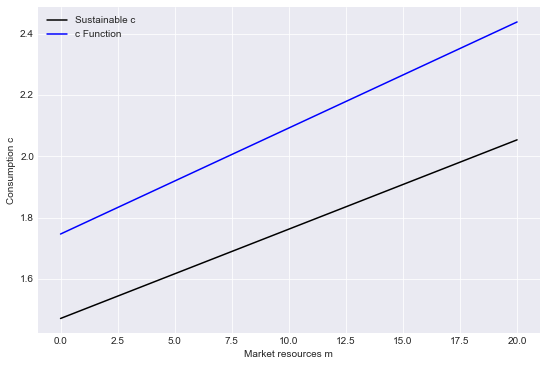

In [11]:
# QUESTION: Now calculate and plot the "sustainable" level of consumption that leaves wealth untouched
# and plot it against the perfect foresight solution

cSustainable = (Rfree-1)/(Rfree-PermGroFac[0]) + (rfree/Rfree)*(m_range-1) # For any given level of m, the level of c that would leave wealth unchanged
# Obviously, 0 is the wrong formula here -- you should fill in the right one

plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c') # y axis label

plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line
plt.plot(m_range, cHARK, 'b', label='c Function')
plt.legend()

plt.show() # show the plot

In [12]:
# Compute the values of the impatience conditions under default parameter values

Pat_df  = (Rfree*DiscFac)**(1/CRRA) # Plug in the formula for the absolute patience factor
PatR_df = Pat_df/Rfree # Plug in the formula for the return patience factor
PatG_df = Pat_df/PermGroFac[0] # Plug in the formula for the growth patience factor

DiscFac_lim = Rfree**(CRRA-1) # The limiting value such that the RIC exactly fails
PermGroFac_lim = (Rfree*DiscFac)**(1/CRRA) # The limiting value such that the GIC exactly fails

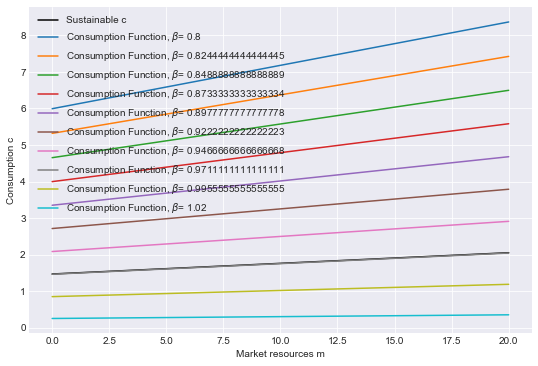

In [13]:
# The code below is an example to show you how to plot a set of consumption functions
# for a sequence of values of the discount factor.  You should be
# to adapt this code to solve the rest of the sproblem posed above

howClose=0.01 # How close to come to the limit where the impatience condition fails
DiscFac_min = 0.8
DiscFac_max = DiscFac_lim-howClose # 
numPoints = 10
DiscFac_list = np.linspace(DiscFac_min, DiscFac_max, numPoints) # Create a list of beta values

plt.figure(figsize=((9,6))) # set the plot size

plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line
for i in range(len(DiscFac_list)):
    PFagent.DiscFac = DiscFac_list[i]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $\\beta$= '+str(PFagent.DiscFac))

PFagent.DiscFac = Params.DiscFac # return discount factor to default value
PFagent.solve() # It's nice to leave the PFagent back with its default solution
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()                       # plot chart


With $\beta$ going up, the slope of the line should be increasing as shown in the graph. When $\beta$ goes up to the limit which return patience factor condition requires, the slope is going up zero. Then the problem doesn't have a meaningful solution. 

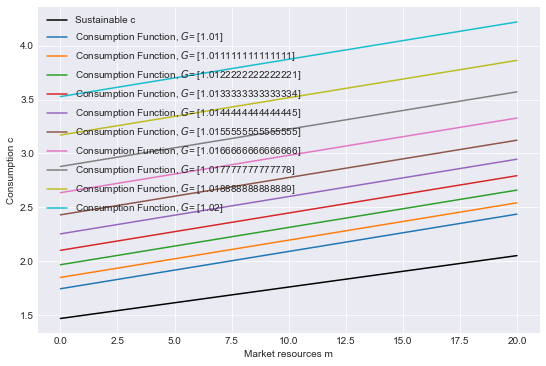

In [14]:
# Now plot the consumption functions for alternate values of G as described above
# Note the tricky fact that PermGroFac is a list of values because it could 
# be representing some arbitrary sequence of growth rates
# QUESTION: What is the upper bound for possible values of G?  Why?

# Upper bound for possible values of G is R, otherwise, the problem has no solution. 

PermGro_min = PermGroFac[0]
PermGro_max = Rfree-howClose # Arbitrary number larger than the default value
PermGroArray = np.linspace(PermGro_min, PermGro_max, numPoints, endpoint=True)
PermGroList = PermGroArray.tolist() # Make growth factors a list

plt.figure(figsize=((9,6))) # set the plot size

plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line
for i in range(len(PermGroList)):
    PFagent.PermGroFac = [PermGroList[i]]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $G$= '+str(PFagent.PermGroFac))

PFagent.PermGroFac = Params.PermGroFac # return discount factor to default value
PFagent.solve() # It's nice to leave the PFagent back with its default solution
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()                       # plot chart



$G$ doesn't relate to the slope, because the slope of the line is just related to interest rate and $\beta$ as well as $\rho$. However, $G$ relates to the intercept since $G$ has an effect of the present value of human wealth. $G$ has an upper bound as $R$, i.e. finite human wealth condiction, otherwise there's no solution of the problem. 

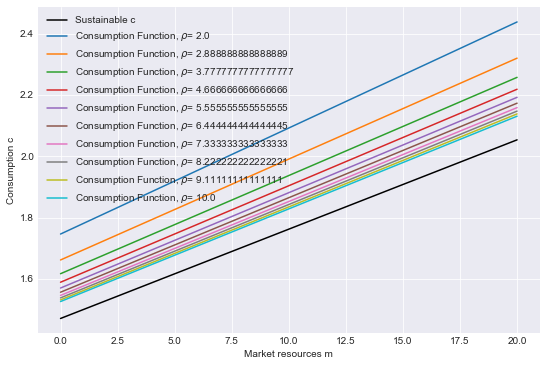

In [16]:
# Now plot the consumption functions for values of rho above the default value

CRRA_min = CRRA
CRRA_max = 10 # Arbitrary number larger than the default value
CRRA_Array = np.linspace(CRRA_min, CRRA_max, numPoints, endpoint=True)
CRRA_List = CRRA_Array.tolist() # Make growth factors a list

plt.figure(figsize=((9,6))) # set the plot size

plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line

for i in range(len(CRRA_List)):
    PFagent.CRRA = CRRA_List[i]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $\\rho$= '+str(PFagent.CRRA))

PFagent.CRRA = Params.CRRA # return discount factor to default value
PFagent.solve() # It's nice to leave the PFagent back with its default solution
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()                       # plot chart


When $\rho$ goes up, the slope gets closer to $r/R$, as shown in the graph. All these lines are above the line representing sustainable consumption because in these situations, the consumer is absolutely impatient. 